In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [65]:
import math
import numpy as np
import pandas as pd

import scikitplot
import seaborn as sns
from matplotlib import pyplot
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils

from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D, Concatenate, Activation, Flatten
from tensorflow.keras.models import Sequential

In [66]:
df = pd.read_csv('../input/facial-expression-recognitionferchallenge/fer2013/fer2013/fer2013.csv')
print(df.shape)
df.head()

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [199]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [67]:
def info_of_data(Data):
    Output=pd.DataFrame(
        {
                    "Tpye" : Data.dtypes,
                    "No_of_elements" : Data.count(),
                    "No_Invalid_Elements" : Data.isnull().sum(),
                    "Unique_Elements" : Data.nunique()
        }
    )
    return Output

In [4]:
info_of_data(df)

,Tpye,No_of_elements,No_Invalid_Elements,Unique_Elements
emotion,int64,35887,0,7
pixels,object,35887,0,34034
Usage,object,35887,0,3


In [5]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [6]:
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

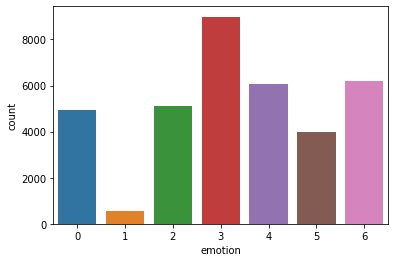

In [7]:
sns.countplot(df.emotion)
pyplot.show()

`So majority classes belongs to 3:Happy, 4:Sad and 6:Neutral nd we are also intersted in these three classes only.`

In [68]:
math.sqrt(len(df.pixels[0].split(' ')))

48.0

In [69]:
INTERESTED_LABELS = [3, 4, 6, 2]

In [200]:
index3= df[df['emotion']==3].head(550)
index4= df[df['emotion']==4].head(550)
index6= df[df['emotion']==6].head(550)
index2= df[df['emotion']==2].head(550)

In [201]:
index1= df[df['emotion']==1].head(550)
index0= df[df['emotion']==0].head(550)
index5= df[df['emotion']==5].head(550)

In [202]:
test=index3.iloc[500:550]
test=test.append(index1.iloc[500:547])
test=test.append(index6.iloc[500:550])
test=test.append(index5.iloc[500:550])
test.shape

(197, 3)

In [203]:
index3=index3.iloc[:500]

In [204]:
index3=index3.append(index1.iloc[:500])
index3=index3.append(index6.iloc[:500])
index3=index3.append(index5.iloc[:500])
index3.shape

(2000, 3)

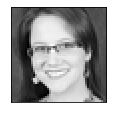

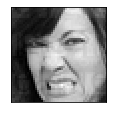

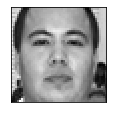

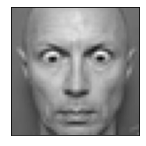

In [205]:
pyplot.figure(1, (14, 14))

px = index3.pixels.iloc[0]
px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
ax = pyplot.subplot(1,7, 2)
ax.imshow(px, cmap='gray')
ax.set_xticks([])
ax.set_yticks([])

pyplot.figure(2, (14, 14))
px = index1.pixels.iloc[1]
px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
ax = pyplot.subplot(1,7, 2)
ax.imshow(px, cmap='gray')
ax.set_xticks([])
ax.set_yticks([])


pyplot.figure(4, (14, 14))
px = index6.pixels.iloc[7]
px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
ax = pyplot.subplot(1,7, 4)
ax.imshow(px, cmap='gray')
ax.set_xticks([])
ax.set_yticks([])


pyplot.figure(6, (14, 14))
px = index5.pixels.iloc[0]
px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
ax = pyplot.subplot(1,7, 6)
ax.imshow(px, cmap='gray')
ax.set_xticks([])
ax.set_yticks([])
# ax.set_title(emotion_label_to_text[label])
pyplot.tight_layout()

In [206]:
index3 = sklearn.utils.shuffle(index3)
index3.shape

(2000, 3)

`Now I will make the data compatible for neural networks.`

In [207]:
img_array = index3.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
img_array = np.stack(img_array, axis=0)

In [208]:
img_array.shape

(2000, 48, 48, 1)

In [209]:
t_img_array = test.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
t_img_array = np.stack(t_img_array, axis=0)
t_img_array.shape

(197, 48, 48, 1)

In [210]:
le = LabelEncoder()
img_labels = le.fit_transform(index3.emotion)
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape

(2000, 4)

In [211]:
t_img_labels = le.transform(test.emotion)
t_img_labels = np_utils.to_categorical(t_img_labels)
t_img_labels.shape

(197, 4)

In [154]:
# y_valid[:5],np.argmax(y_valid[:5], axis=-1)

In [77]:
# np_utils.to_categorical(le.fit_transform([3,2,1])) #use to test functionallity of the functions

In [212]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{1: 0, 3: 1, 5: 2, 6: 3}


In [213]:
le_mapping_name = { 0: 2, 1: 3, 2: 4, 3: 6 }

`Splitting the data into training and validation set.`

In [214]:
# X_train, X_valid, y_train, y_valid = train_test_split(img_array, img_labels,
#                                                     shuffle=True, stratify=img_labels,
#                                                     test_size=0.05, random_state=42)
# X_train.shape, X_valid.shape, y_train.shape, y_valid.shape
X_train, X_valid, y_train, y_valid = img_array,t_img_array, img_labels,t_img_labels

In [215]:
y_valid.shape

(197, 4)

In [195]:
del index3,index4,index6,index2
del img_array
del img_labels

In [216]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

In [217]:
# Normalizing results, as neural networks are very sensitive to unnormalized data.
X_train = X_train / 255.
X_valid = X_valid / 255.

In [218]:
y_train[0].shape

(4,)

See in the first row 7th image looks more like neutral rather than sad and our model even predicted it neutral. Whereas the last image in second row is very much sad.

In [ ]:
MO.evaluate(X_valid,y_valid)

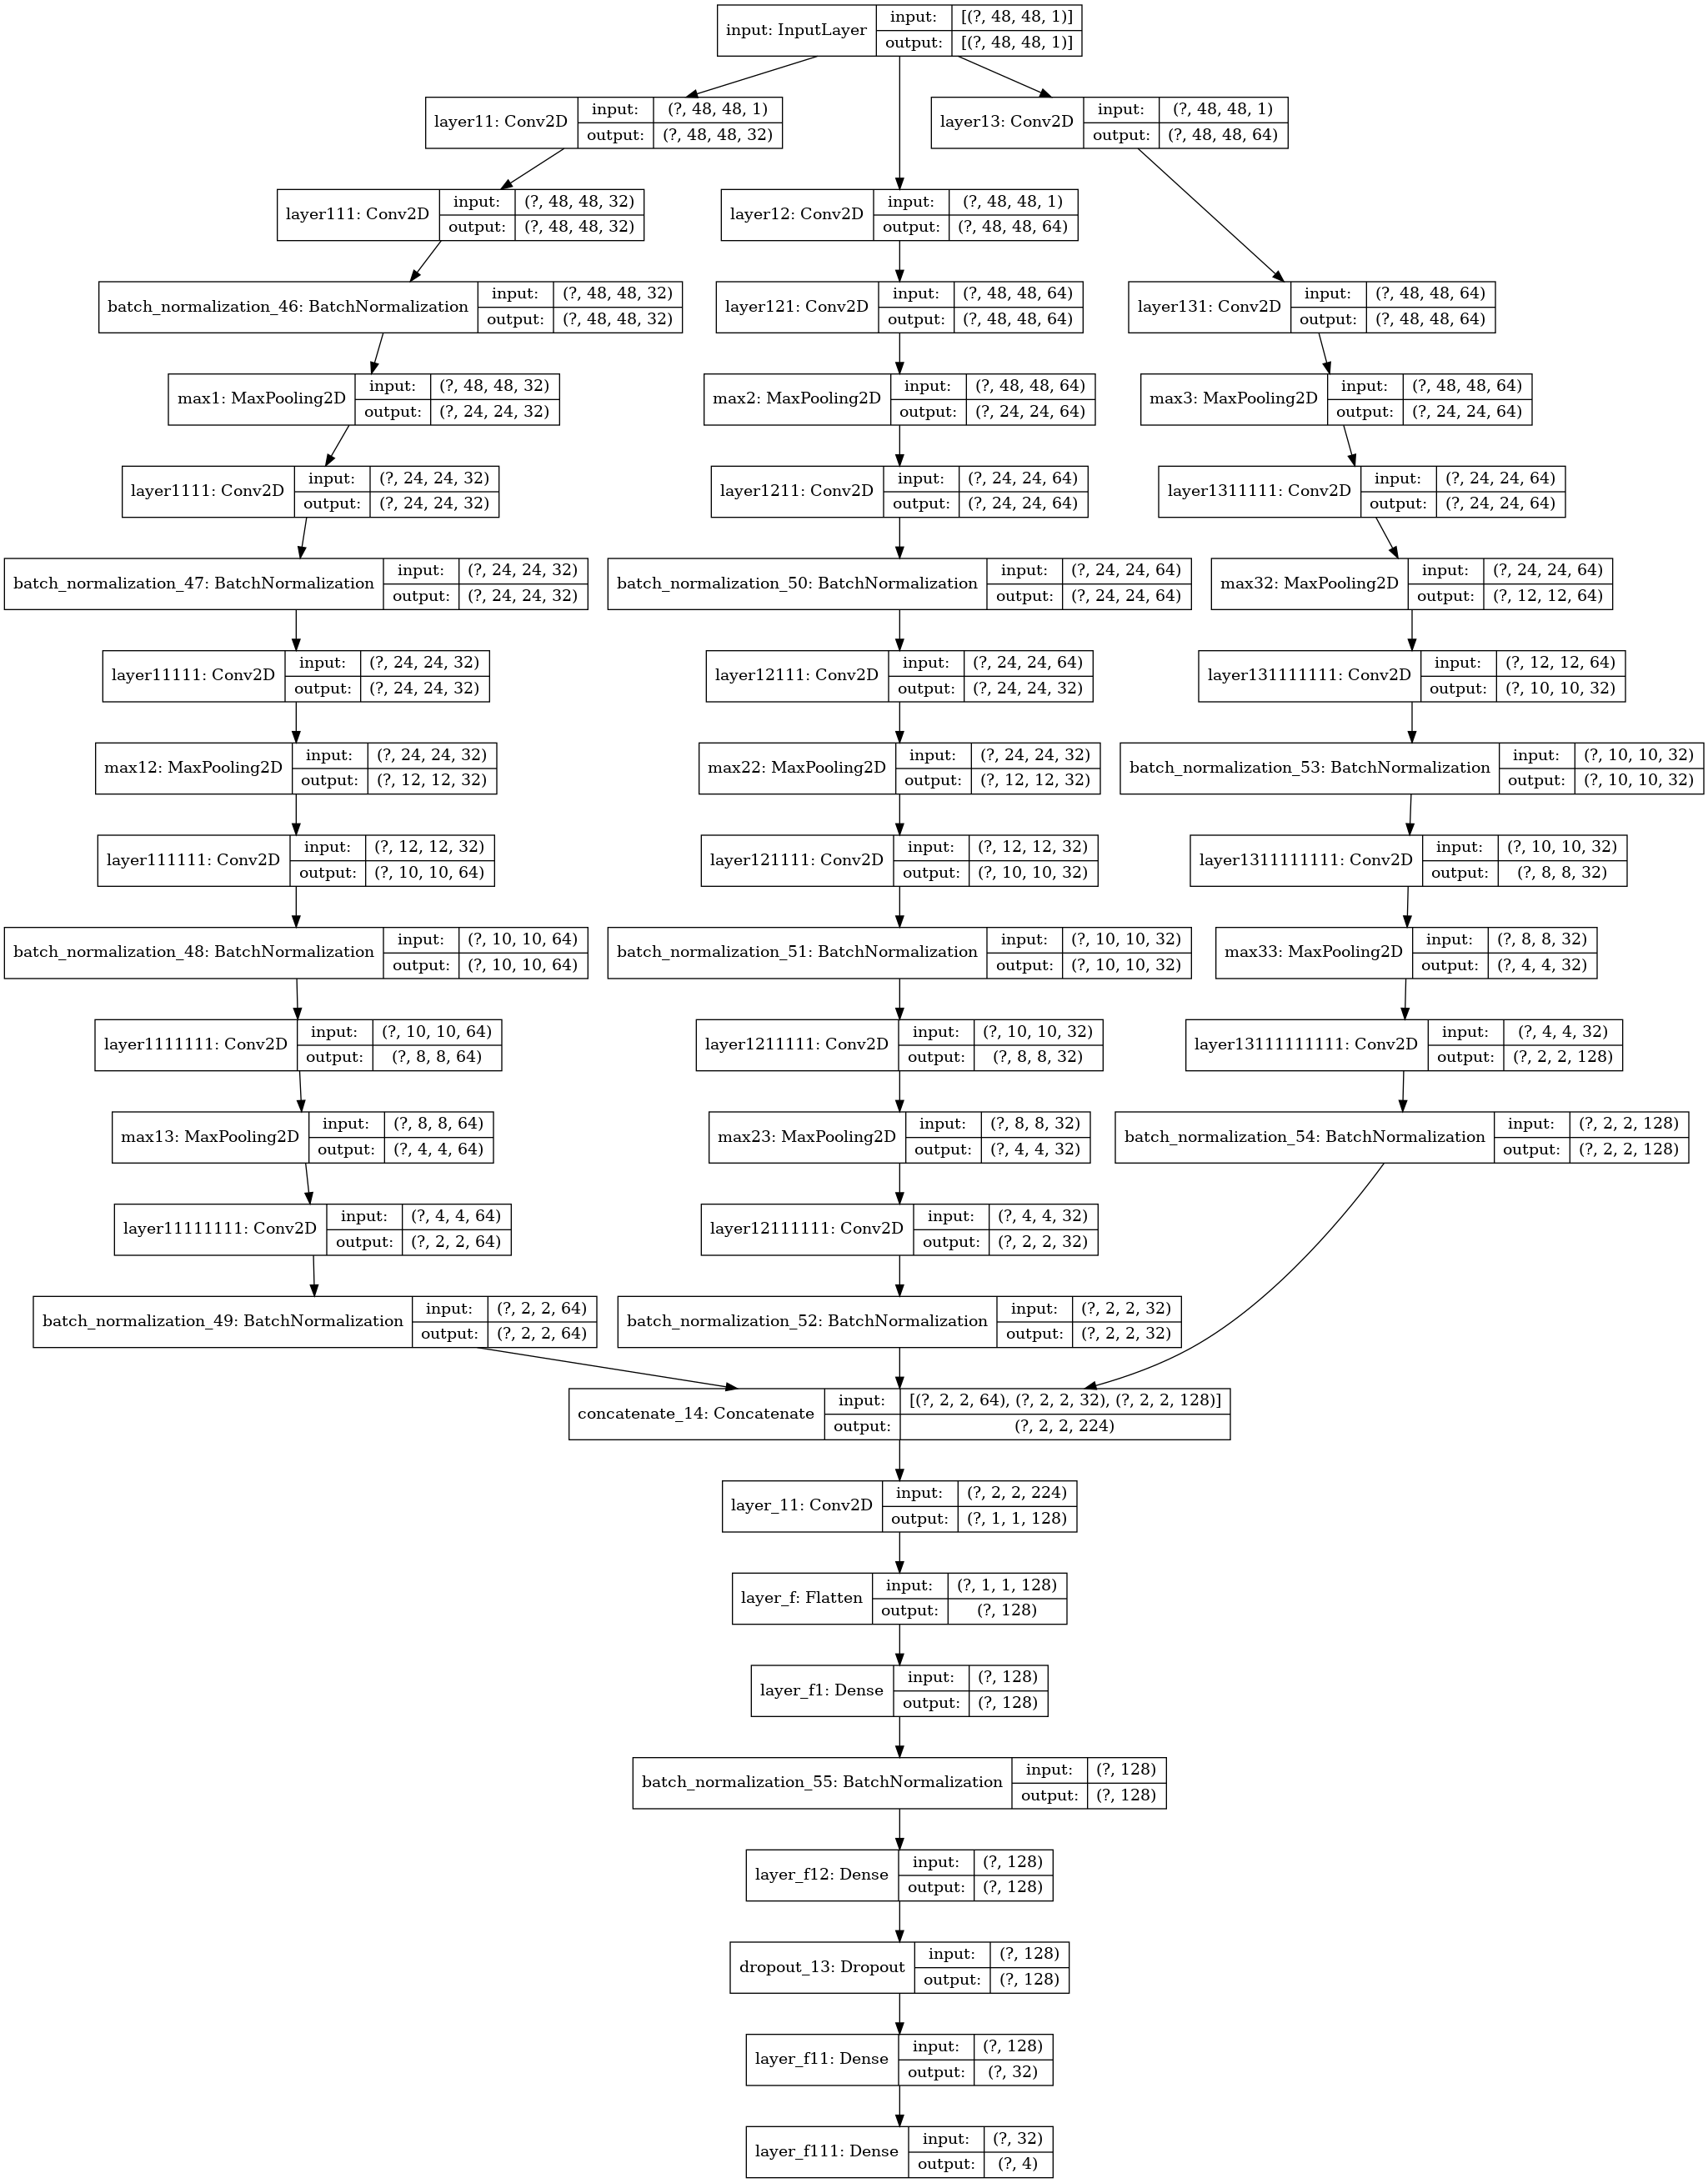

In [219]:
# def Classifer(optim):

length,width,depth=(48,48,1)
# bolck 1
layer1 = Input(shape=(length,width,depth), name='input')
layer11 = Conv2D(32, 3, padding='same',activation='relu', name="layer11")(layer1)
layer11111 = Conv2D(32, 3, padding='same',activation='relu', name="layer111")(layer11)
layer11111 = BatchNormalization()(layer11111)
layer111 = MaxPool2D((2,2),name= 'max1')(layer11111)
layer1111 = Conv2D(32, 3, padding='same',activation='relu', name="layer1111")(layer111)
layer1111 = BatchNormalization()(layer1111)
layer11111 = Conv2D(32, 3, padding='same',activation='relu', name="layer11111")(layer1111)
layer11111 = MaxPool2D((2,2),name= 'max12')(layer11111)
layer111111 = Conv2D(64, 3,activation='relu', name="layer111111")(layer11111)
layer111111 = BatchNormalization()(layer111111)
layer1111111 = Conv2D(64, 3,activation='relu', name="layer1111111")(layer111111)
layer1111111 = MaxPool2D((2,2),name= 'max13')(layer1111111)
layer11111111 = Conv2D(64, 3,activation='relu', name="layer11111111")(layer1111111)
layer11111111 = BatchNormalization()(layer11111111)

# bolck 2
layer12 = Conv2D(64, 3, padding='same',activation='relu', name="layer12")(layer1)
layer12111 = Conv2D(64, 3, padding='same',activation='relu', name="layer121")(layer12)
layer121 = MaxPool2D((2,2),name= 'max2')(layer12111)
layer1211 = Conv2D(64, 3, padding='same',activation='relu', name="layer1211")(layer121)
layer1211 = BatchNormalization()(layer1211)
layer12111 = Conv2D(32, 3, padding='same',activation='elu', name="layer12111")(layer1211)
layer12111 = MaxPool2D((2,2),name= 'max22')(layer12111)
layer121111 = Conv2D(32, 3, activation='elu', name="layer121111")(layer12111)
layer121111 = BatchNormalization()(layer121111)
layer1211111 = Conv2D(32, 3, activation='elu', name="layer1211111")(layer121111)
layer1211111 = MaxPool2D((2,2),name= 'max23')(layer1211111)
layer12111111 = Conv2D(32, 3, activation='elu', name="layer12111111")(layer1211111)
layer12111111 = BatchNormalization()(layer12111111)


layer13 = Conv2D(64, 5, padding='same',activation='relu', name="layer13")(layer1)
layer13111111 = Conv2D(64, 3, padding='same',activation='relu', name="layer131")(layer13)
layer131 = MaxPool2D((2,2),name= 'max3')(layer13111111)
layer1311111 = Conv2D(64, 3,padding='same',activation='relu', name="layer1311111")(layer131)
layer13111111 = MaxPool2D((2,2),name= 'max32')(layer1311111)
layer131111111 = Conv2D(32, 3, activation='elu', name="layer131111111")(layer13111111)
layer131111111 = BatchNormalization()(layer131111111)
layer1311111111 = Conv2D(32, 3, activation='elu', name="layer1311111111")(layer131111111)
layer1311111111 = MaxPool2D((2,2),name= 'max33')(layer1311111111)
layer13111111111 = Conv2D(128, 3,activation='elu', name="layer13111111111")(layer1311111111)
layer13111111111 = BatchNormalization()(layer13111111111)


layer_1=Concatenate()([layer11111111, layer12111111,layer13111111111])

layer_11 = Conv2D(128, 2,activation='relu', name="layer_11")(layer_1)
# layer_11 = MaxPool2D((2,2),name= 'max4')(layer_11)
# layer_111 = Conv2D(64, 3,activation='relu', name="layer_111")(layer_11)
# layer_111 = MaxPool2D((2,2),name= 'max5')(layer_111)
# layer_1111 = Conv2D(64, 2,activation='relu', name="layer_1111")(layer_111)
# # layer_11111 = Conv2D(64, 3,activation='elu', name="layer_11111")(layer_1111)
# # layer_111111 = Conv2D(64, 9,activation='elu', name="layer_111111")(layer_11111)
layer_f = Flatten(name='layer_f')(layer_11)
layer_f1 = Dense(128, activation='relu', name='layer_f1')(layer_f)
layer_f1 = BatchNormalization()(layer_f1)
layer_f12 = Dense(128, activation='relu', name='layer_f12')(layer_f1)
layer_f1d = Dropout(0.2)(layer_f12)
layer_f11 = Dense(32, activation='relu', name='layer_f11')(layer_f1d)
layer_f111 = Dense(4, activation='softmax', name='layer_f111')(layer_f11)

Output=layer_f111
model=tf.keras.Model(layer1,Output)
tf.keras.utils.plot_model(model, show_shapes=True)

In [220]:
optim='adam'
model.compile( optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_29"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
layer11 (Conv2D)                (None, 48, 48, 32)   320         input[0][0]                      
__________________________________________________________________________________________________
layer111 (Conv2D)               (None, 48, 48, 32)   9248        layer11[0][0]                    
__________________________________________________________________________________________________
layer12 (Conv2D)                (None, 48, 48, 64)   640         input[0][0]                      
___________________________________________________________________________________________

In [ ]:
# MO.fit(X_train,y_train, epochs=20, batch_size=300, validation_data=(X_valid,y_valid), shuffle=True)
model.fit(X_train,y_train, epochs=20, batch_size=100, validation_data=(X_valid,y_valid), shuffle=True)

In [1]:
def Predict( x):
    y_pred=model.predict(x)
    y_pred=tf.one_hot(tf.argmax(y_pred, axis=1), depth = 4)
#     y_pred=m.Y_B_onehot_2_category(np.array(y_pred))
    return y_pred

In [ ]:
y_pred=Predict(X_valid)

In [229]:
np.sum(np.argmax(y_pred, axis=-1)==np.argmax(y_valid, axis=-1))

100

In [118]:
y_valid.shape

(100, 4)

In [233]:
y_valid[90:100],y_valid[90:100]

(array([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]], dtype=float32),
 array([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]], dtype=float32))

In [230]:
model.save("my_h5_model_ganesha.h5")

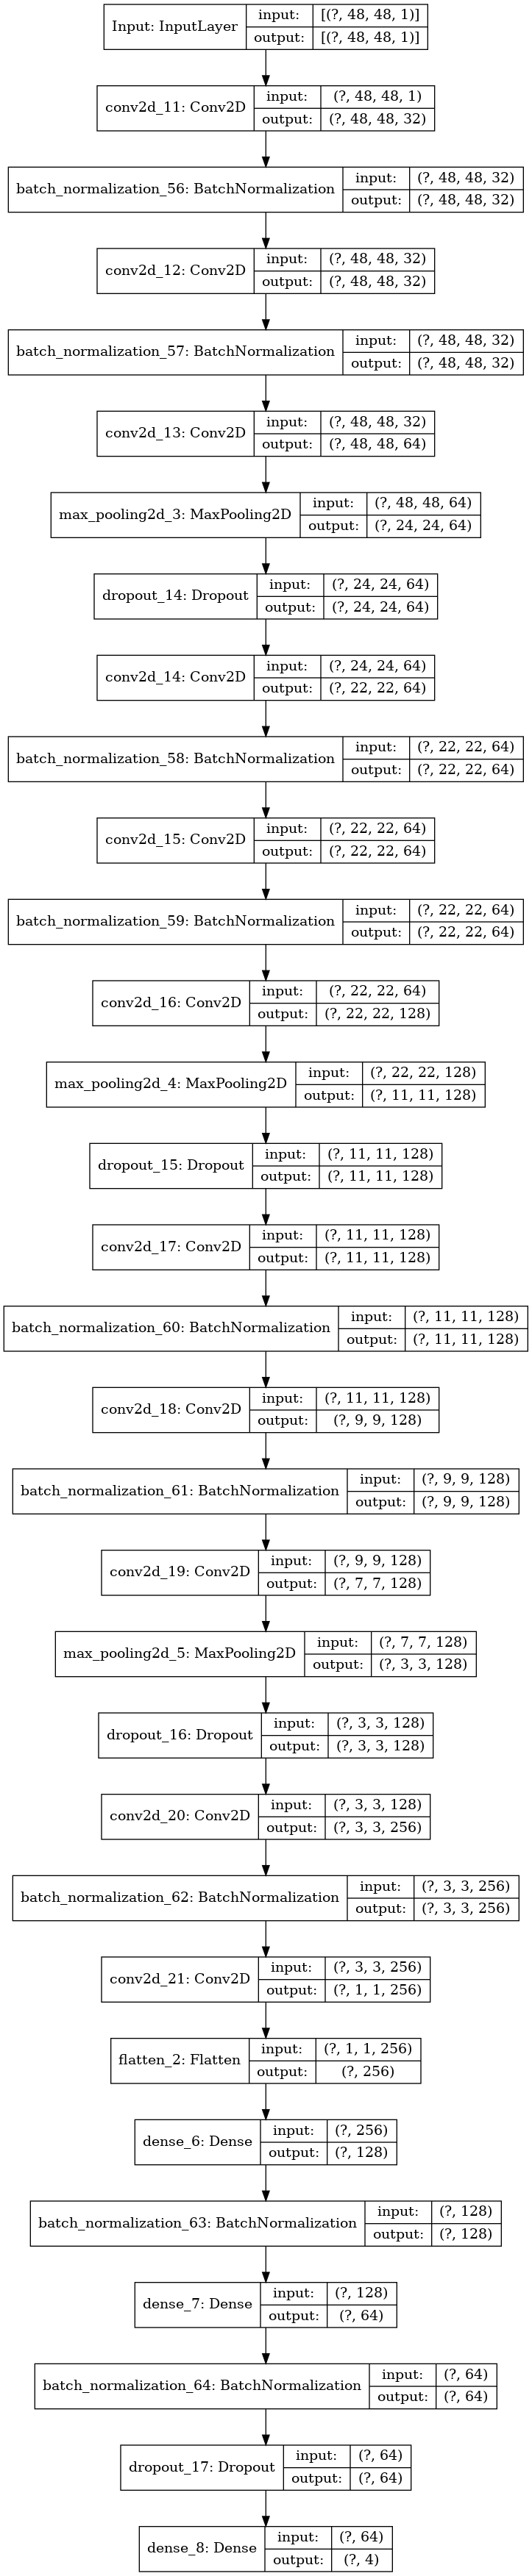

In [223]:
length,width,depth=(48,48,1)
model=Sequential([
    Input(shape=(length,width,depth),name='Input'),

    Conv2D(32, 3,padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(32, 3,padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, 3,padding='same', activation='relu'),
    MaxPool2D((2,2)),
    Dropout(0.2),

    Conv2D(64, 3,activation='relu'),
    BatchNormalization(),
    Conv2D(64, 3,padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, 3,padding='same', activation='relu'),
    MaxPool2D((2,2)),
    Dropout(0.2),

    Conv2D(128, 3,padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, 3,activation='relu'),
    BatchNormalization(),
    Conv2D(128, 3,activation='relu'),
    MaxPool2D((2,2)),
    Dropout(0.2),

    Conv2D(256, 3,padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(256, 3,activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(4, activation='softmax'),


])

tf.keras.utils.plot_model(model, show_shapes=True)

In [224]:
optim='adam'
model.compile( optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_56 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_57 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 24, 24, 64)       

In [225]:
model.fit(X_train,y_train, epochs=20, batch_size=100, validation_data=(X_valid,y_valid), shuffle=True)

Train on 2000 samples, validate on 197 samples
Epoch 1/20
2000/2000 [==============================] - 39s 20ms/sample - loss: 1.9529 - accuracy: 0.2860 - val_loss: 1.3953 - val_accuracy: 0.2538
Epoch 2/20
2000/2000 [==============================] - 38s 19ms/sample - loss: 1.6781 - accuracy: 0.3195 - val_loss: 1.4020 - val_accuracy: 0.2538
Epoch 3/20
2000/2000 [==============================] - 48s 24ms/sample - loss: 1.5518 - accuracy: 0.3505 - val_loss: 1.4107 - val_accuracy: 0.2640
Epoch 4/20
2000/2000 [==============================] - 38s 19ms/sample - loss: 1.3890 - accuracy: 0.4125 - val_loss: 1.3905 - val_accuracy: 0.2538
Epoch 5/20
2000/2000 [==============================] - 38s 19ms/sample - loss: 1.2648 - accuracy: 0.4805 - val_loss: 1.4921 - val_accuracy: 0.2538
Epoch 6/20
2000/2000 [==============================] - 38s 19ms/sample - loss: 1.1929 - accuracy: 0.5170 - val_loss: 1.5798 - val_accuracy: 0.2538
Epoch 7/20
2000/2000 [==============================] - 38s 19ms/

In [231]:
model.save('ganesha.h5')